In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2
from tqdm import tqdm

#simple

In [9]:
import numpy as np
from scipy.integrate import solve_ivp

# Constantes physiques
R = 287.05  # Constante des gaz parfaits, J/(kg·K)
Cp = 1005.0  # Capacité thermique à pression constante, J/(kg·K)
kappa = R / Cp  # Rapport des constantes
f = 1e-4  # Paramètre de Coriolis (simplifié pour les latitudes moyennes)
g = 9.81  # Gravité, m/s²

# Dimensions de la grille
grid_size = (50, 50)  # Grille horizontale (latitude x longitude)

# Initialisation des variables
def initial_conditions(grid_size):
    """Initialise les conditions de divergence, vorticité, température, etc."""
    divergence = np.zeros(grid_size)  # Divergence initiale (0 partout)
    vorticity = np.zeros(grid_size)  # Vorticité initiale (0 partout)
    temperature = 300 + np.random.randn(*grid_size)  # Température perturbée
    log_pressure = np.log(1000 * 100) * np.ones(grid_size) + np.random.randn(*grid_size) # Pression de surface (log(P))
    humidity = np.random.rand(*grid_size) * 0.01  # Humidité spécifique initiale
    return divergence, vorticity, temperature, log_pressure, humidity

# Équations primitives
def primitive_equations(t, y, grid_shape):
    """
    Résout les équations différentielles pour divergence, vorticité, etc.
    """
    # Reformater l'état pour les dimensions de la grille
    divergence, vorticity, temperature, log_pressure, humidity = y.reshape((5, *grid_shape))

    # Calcul des gradients simplifiés (à adapter pour des gradients plus réalistes)
    grad_temp_x, grad_temp_y = np.gradient(temperature)  # Gradients de température
    grad_press_x, grad_press_y = np.gradient(log_pressure)  # Gradients de pression

    # Placeholder pour les calculs des dérivées temporelles
    d_divergence_dt = - (grad_temp_x + grad_temp_y)  # Exemple simplifié
    d_vorticity_dt = f * divergence  # Interaction avec Coriolis
    d_temperature_dt = - (grad_temp_x + grad_temp_y)  # Simplifié
    d_humidity_dt = - (grad_temp_x + grad_temp_y)  # Simplifié
    d_log_pressure_dt = - (grad_press_x + grad_press_y)  # Simplifié

    # Retourner les dérivées comme un tableau aplati
    return np.concatenate([
        d_divergence_dt.ravel(),
        d_vorticity_dt.ravel(),
        d_temperature_dt.ravel(),
        d_log_pressure_dt.ravel(),
        d_humidity_dt.ravel()
    ])

# Simulation
def run_simulation(grid_size, t_span, t_eval):
    """
    Lance la simulation des équations primitives sur une grille 2D.
    """
    # Initialisation des variables d'état
    initial_state = initial_conditions(grid_size)
    y0 = np.concatenate([v.ravel() for v in initial_state])  # Concaténer en 1D

    # Résolution des équations différentielles
    result = solve_ivp(
        fun=primitive_equations,  # Fonction des équations différentielles
        t_span=t_span,  # Intervalle de temps
        y0=y0,  # État initial aplati
        t_eval=t_eval,  # Temps où évaluer les solutions
        args=(grid_size,)  # Arguments supplémentaires (taille de la grille)
    )
    return result

# Paramètres de la simulation
t_span = (0, 1000)  # Intervalle de temps (0 à 1000)
t_eval = np.linspace(0, 1000, 100)  # Pas de temps (100 points)

# Lancer la simulation
result = run_simulation(grid_size, t_span, t_eval)

# Analyse des résultats
# Reformater les résultats pour retrouver la structure 3D (variable x grille x temps)
divergence, vorticity, temperature, log_pressure, humidity = result.y.reshape((5, *grid_size, -1))

# Exemple d'affichage des résultats
print("Simulation terminée. Taille des résultats :")
print(f"Divergence : {divergence.shape}")
print(f"Vorticité : {vorticity.shape}")
print(f"Température : {temperature.shape}")


Simulation terminée. Taille des résultats :
Divergence : (50, 50, 100)
Vorticité : (50, 50, 100)
Température : (50, 50, 100)


In [10]:
"""for i in range(divergence.shape[2]):
    if i % 1 == 0:
        fig, ax = plt.subplots(figsize=(10, 6))

        # Extraction de l'instantané pour le pas de temps i
        snapshot = divergence[:, :, i]

        # Affichage de la température avec une carte de couleurs
        img = ax.imshow(snapshot, cmap="coolwarm", origin="lower")
        cbar = plt.colorbar(img, ax=ax, label="divergence (K)")
        ax.set_title(f"Température au temps t={t_eval[i]:.1f} s")
        ax.set_xlabel("Longitude ")
        ax.set_ylabel("Latitude")
        plt.show()"""

'for i in range(divergence.shape[2]):\n    if i % 1 == 0:\n        fig, ax = plt.subplots(figsize=(10, 6))\n\n        # Extraction de l\'instantané pour le pas de temps i\n        snapshot = divergence[:, :, i]\n\n        # Affichage de la température avec une carte de couleurs\n        img = ax.imshow(snapshot, cmap="coolwarm", origin="lower")\n        cbar = plt.colorbar(img, ax=ax, label="divergence (K)")\n        ax.set_title(f"Température au temps t={t_eval[i]:.1f} s")\n        ax.set_xlabel("Longitude ")\n        ax.set_ylabel("Latitude")\n        plt.show()'

In [11]:
import matplotlib.pyplot as plt
for i in range(30):
  # Exemple de visualisation des résultats (affichage pour l'instant t=0)
  time_index = i # Choisir un index temporel (par exemple, t=0)

  # Extraire les données pour l'instant temporel choisi (t=0 dans cet exemple)
  log_pressure_snapshot = log_pressure[:, :, time_index]
  divergence_snapshot = divergence[:, :, time_index]
  vorticity_snapshot = vorticity[:, :, time_index]
  humidity_snapshot = humidity[:, :, time_index]
  temperature_snapshot = temperature[:, :, time_index]

  # Création de la figure avec 5 colonnes pour chaque variable
  fig, axes = plt.subplots(1, 5, figsize=(20, 6))  # 1 ligne, 5 colonnes

  # Log Pressure
  axes[0].imshow(log_pressure_snapshot, cmap="coolwarm", origin="lower")
  axes[0].set_title("Log Pressure")
  axes[0].set_xlabel("Longitude (indice de grille)")
  axes[0].set_ylabel("Latitude (indice de grille)")
  fig.colorbar(axes[0].images[0], ax=axes[0])

  # Divergence
  axes[1].imshow(divergence_snapshot, cmap="coolwarm", origin="lower")
  axes[1].set_title("Divergence")
  axes[1].set_xlabel("Longitude (indice de grille)")
  axes[1].set_ylabel("Latitude (indice de grille)")
  fig.colorbar(axes[1].images[0], ax=axes[1])

  # Vorticity
  axes[2].imshow(vorticity_snapshot, cmap="coolwarm", origin="lower")
  axes[2].set_title("Vorticity")
  axes[2].set_xlabel("Longitude (indice de grille)")
  axes[2].set_ylabel("Latitude (indice de grille)")
  fig.colorbar(axes[2].images[0], ax=axes[2])

  # Humidity
  axes[3].imshow(humidity_snapshot, cmap="coolwarm", origin="lower")
  axes[3].set_title("Humidity")
  axes[3].set_xlabel("Longitude (indice de grille)")
  axes[3].set_ylabel("Latitude (indice de grille)")
  fig.colorbar(axes[3].images[0], ax=axes[3])

  # Temperature
  axes[4].imshow(temperature_snapshot, cmap="coolwarm", origin="lower")
  axes[4].set_title("Temperature (K)")
  axes[4].set_xlabel("Longitude (indice de grille)")
  axes[4].set_ylabel("Latitude (indice de grille)")
  fig.colorbar(axes[4].images[0], ax=axes[4])

  # Ajuster l'espacement entre les subplots
  plt.tight_layout()

  # Afficher la figure
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

#Complexification Poisson

In [12]:
R = 287.05  # Constante des gaz parfaits air sec, J/(kg·K) -> R / Masse_mol = 8.314 / 0,02896
Cp = 1005.0  # Capacité thermique à pression constante, J/(kg·K) -> Cp = (7/2) * R
f = 1e-4  # Paramètre de Coriolis pour une latitude d'environ 45°
g = 9.81
dx = dy = 1.0
dt = 0.1

def initial_conditions(grid_size):
    """
    Initialise des conditions avec :
    - Une dépression au centre de la grille.
    - Une température plus élevée au centre.
    - Une divergence négative au centre.
    - Une humidité plus faible au centre.
    - Une vorticité nulle partout.
    """

    nx, ny = grid_size
    x = np.linspace(-1, 1, nx)
    y = np.linspace(-1, 1, ny)
    X, Y = np.meshgrid(x, y)
    r = np.sqrt(X**2 + Y**2)  # Distance radiale au centre

    vorticity = np.zeros(grid_size)
    divergence = np.ones(grid_size) * (-np.exp(-r**2 / 0.1) * 0.1)
    temperature = np.ones(grid_size) * 300 + np.exp(-r**2 / 0.1) * 5
    log_pressure = np.ones(grid_size) * np.log(1000 * 100) - np.exp(-r**2 / 0.1) * 0.02
    humidity = np.ones(grid_size) * 0.1 * (1 - np.exp(-r**2 / 0.1))

    return divergence, vorticity, temperature, log_pressure, humidity


def compute_gradients(field):
    grad_y, grad_x = np.gradient(field, dy, dx)
    return grad_x, grad_y

def solve_poisson(field, dx, dy):
    ny, nx = field.shape
    kx = 2 * np.pi * np.fft.fftfreq(nx, d=dx)
    ky = 2 * np.pi * np.fft.fftfreq(ny, d=dy)
    kx, ky = np.meshgrid(kx, ky)
    k2 = kx**2 + ky**2
    k2[0, 0] = 1  # Pour éviter la division par 0

    field_hat = fft2(field)
    potential_hat = field_hat / k2
    return np.real(ifft2(potential_hat))

def compute_velocity(divergence, vorticity, dx, dy):
    psi = solve_poisson(divergence, dx, dy)
    chi = solve_poisson(vorticity, dx, dy)

    u = -np.gradient(chi, axis=0) + np.gradient(psi, axis=1)
    v = np.gradient(chi, axis=1) + np.gradient(psi, axis=0)
    return u, v

def solve_equations(t, y, grid_size):
    divergence, vorticity, temperature, log_pressure, humidity = initial_conditions(grid_size)

    # Calcul des composantes du vent à partir de divergence et vorticité
    u, v = compute_velocity(divergence, vorticity, dx, dy)

    # Calcul des gradients
    grad_temp_x, grad_temp_y = compute_gradients(temperature)
    grad_press_x, grad_press_y = compute_gradients(log_pressure)

    # Équations différentielles
    d_divergence_dt = - (u * grad_temp_x + v * grad_temp_y) + f * divergence
    d_vorticity_dt = - (u * grad_temp_x + v * grad_temp_y) + f * vorticity
    d_temperature_dt = - (u * grad_temp_x + v * grad_temp_y)
    d_humidity_dt = - (u * grad_temp_x + v * grad_temp_y)
    d_log_pressure_dt = - (grad_press_x + grad_press_y)

    return np.concatenate([
        d_divergence_dt.ravel(),
        d_vorticity_dt.ravel(),
        d_temperature_dt.ravel(),
        d_log_pressure_dt.ravel(),
        d_humidity_dt.ravel()
    ])

def run_simulation(grid_size, t_span, t_eval):
    initial_state = initial_conditions(grid_size)
    y0 = np.concatenate([v.ravel() for v in initial_state])
    result = solve_ivp(
        solve_equations, t_span, y0, t_eval=t_eval, args=(grid_size,),method='RK45'
    )
    return result


In [13]:
def visualize_results(result, grid_size, t_eval):
    temperature = result.y.reshape((5, *grid_size, -1))[2]
    print("shape",temperature.shape)

    for i in range(temperature.shape[2]):
        if i % 1 == 0:
            fig, ax = plt.subplots(figsize=(10, 6))
            snapshot = temperature[:, :, i]

            img = ax.imshow(snapshot, cmap="coolwarm", origin="lower")
            cbar = plt.colorbar(img, ax=ax, label="Température (K)")
            ax.set_title(f"Température au temps t={t_eval[i]:.1f} s")
            ax.set_xlabel("Longitude")
            ax.set_ylabel("Latitude")

In [14]:
grid_size = (7, 7)
t_span = (0, 20)
t_eval = np.linspace(0, 20, 20)
result = run_simulation(grid_size, t_span, t_eval)

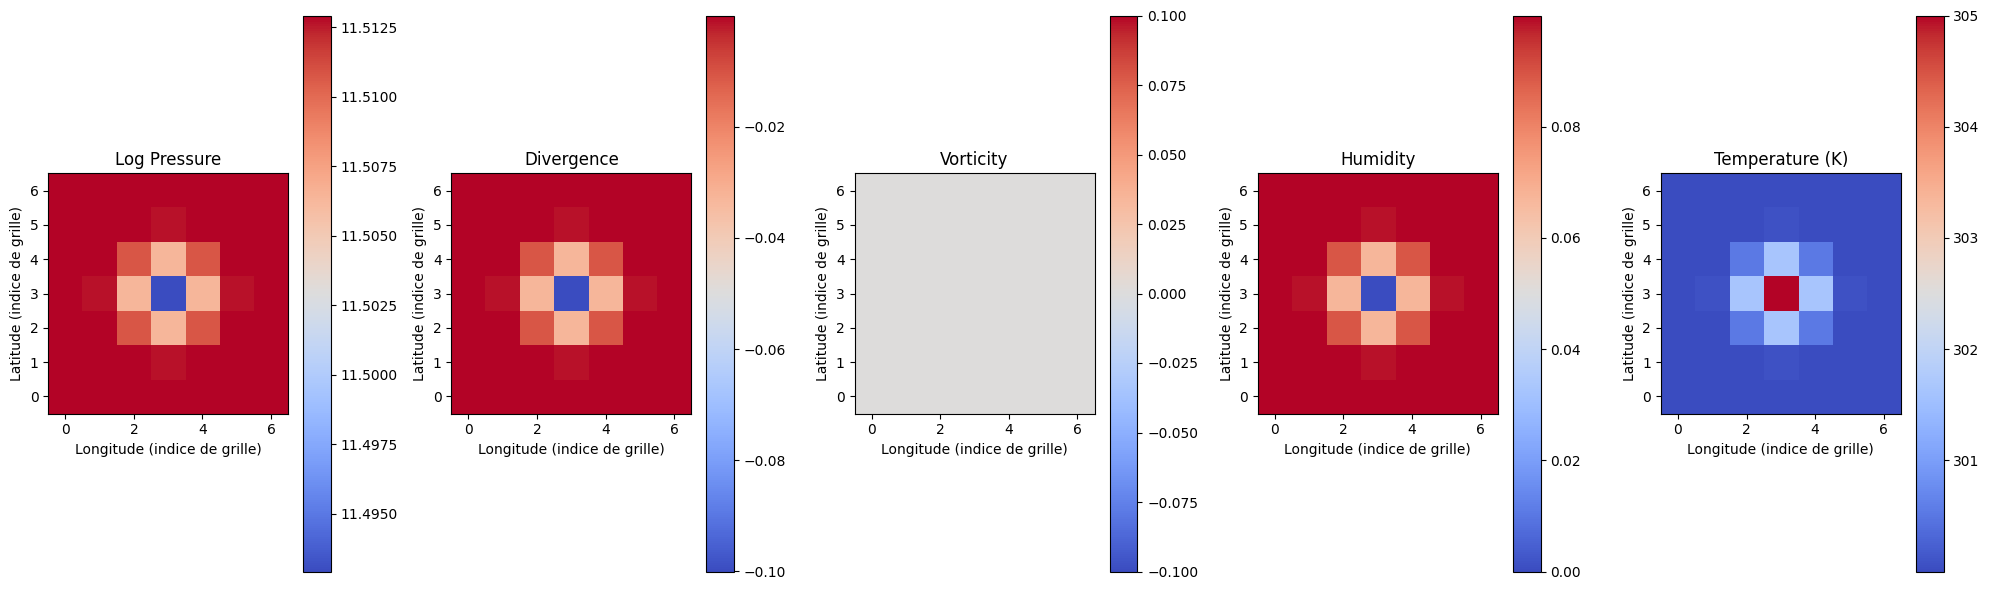

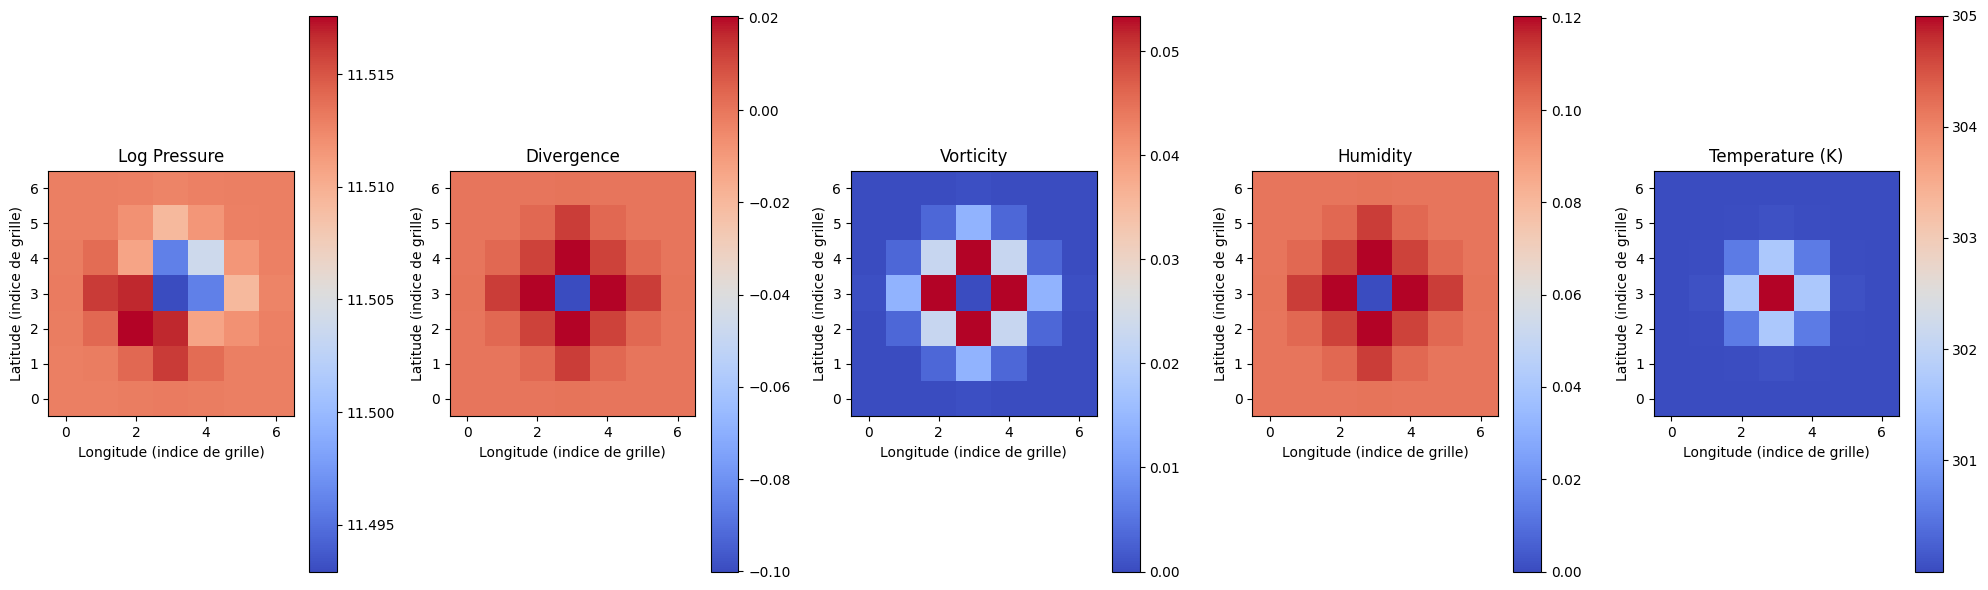

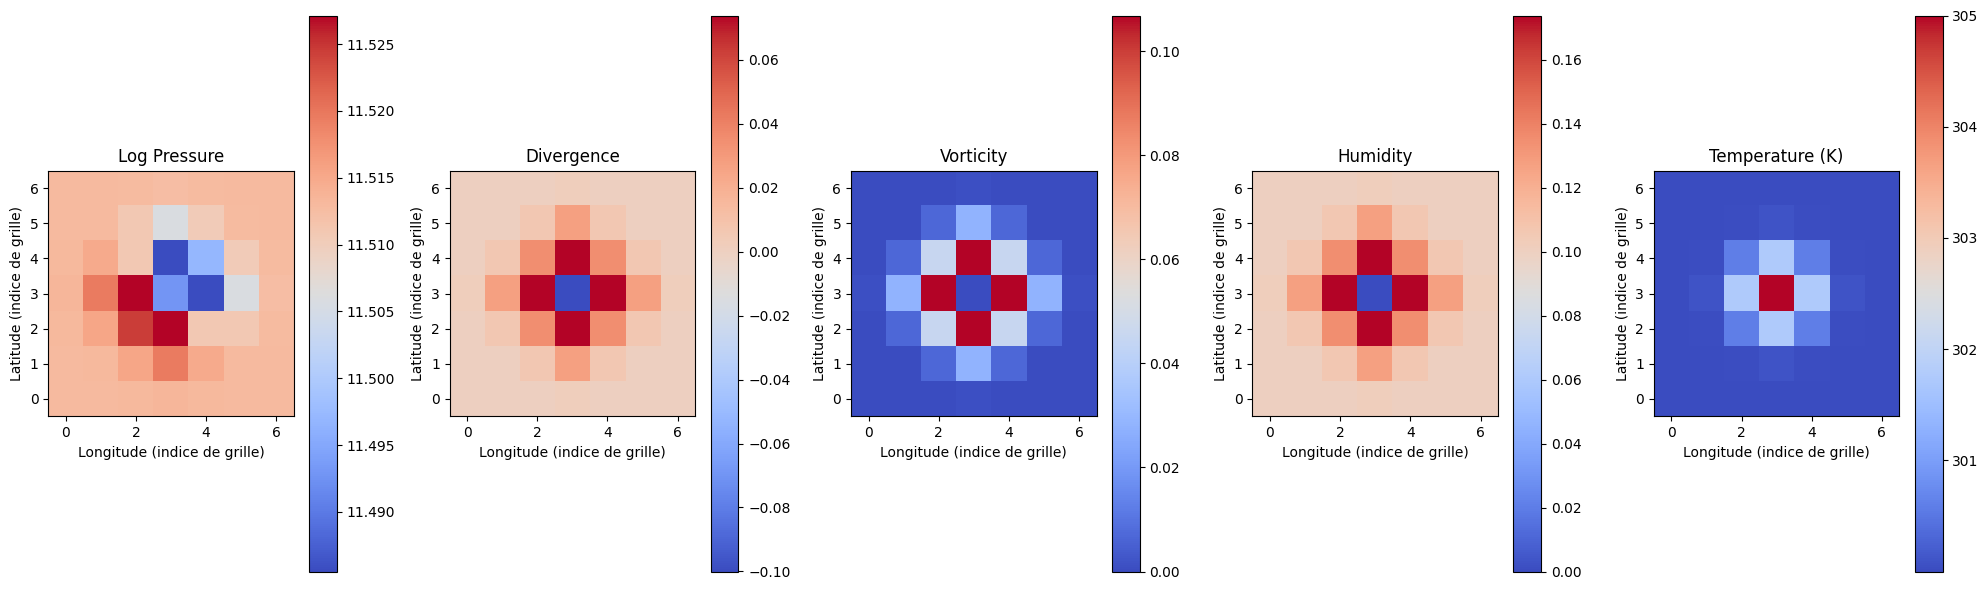

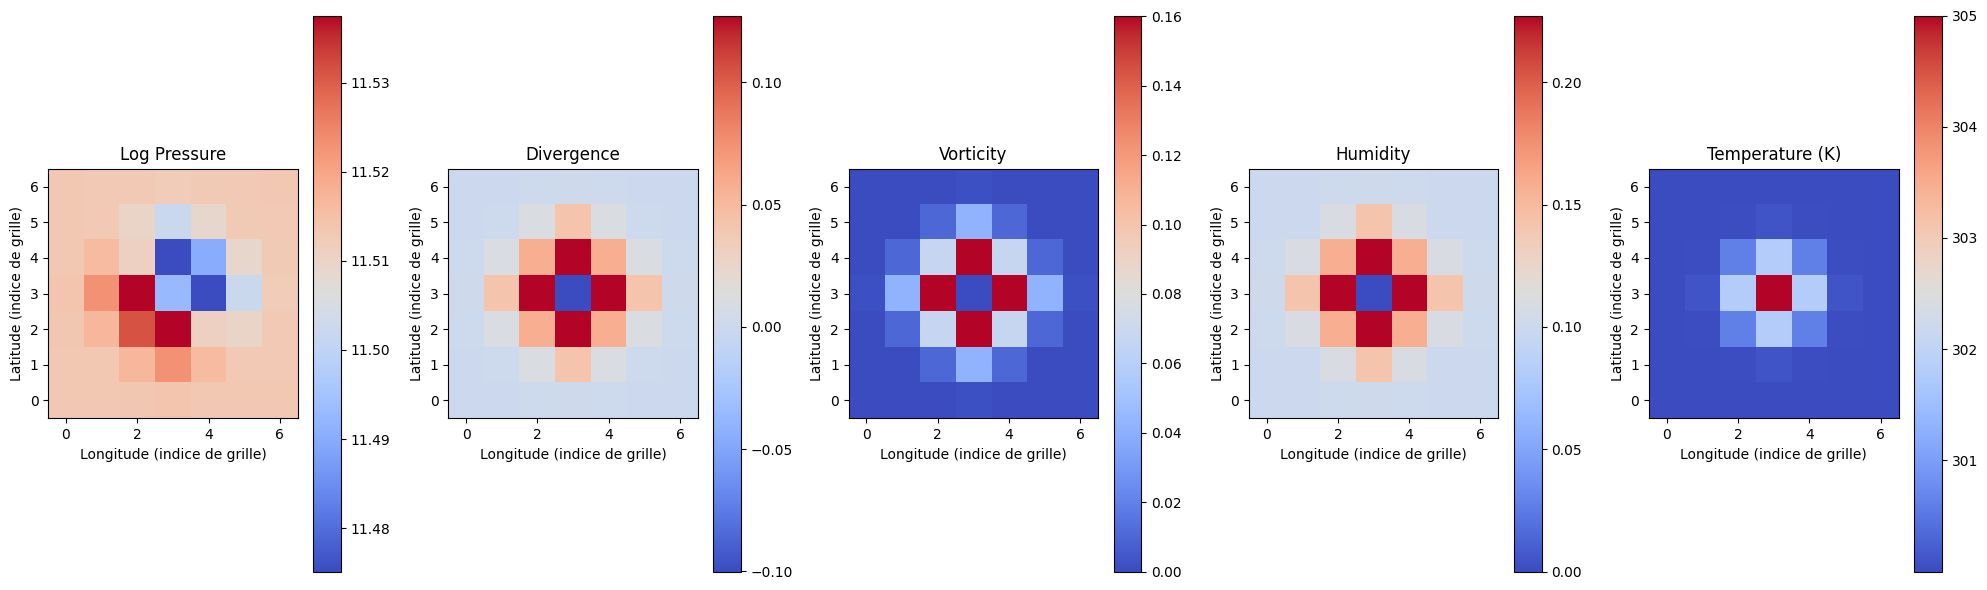

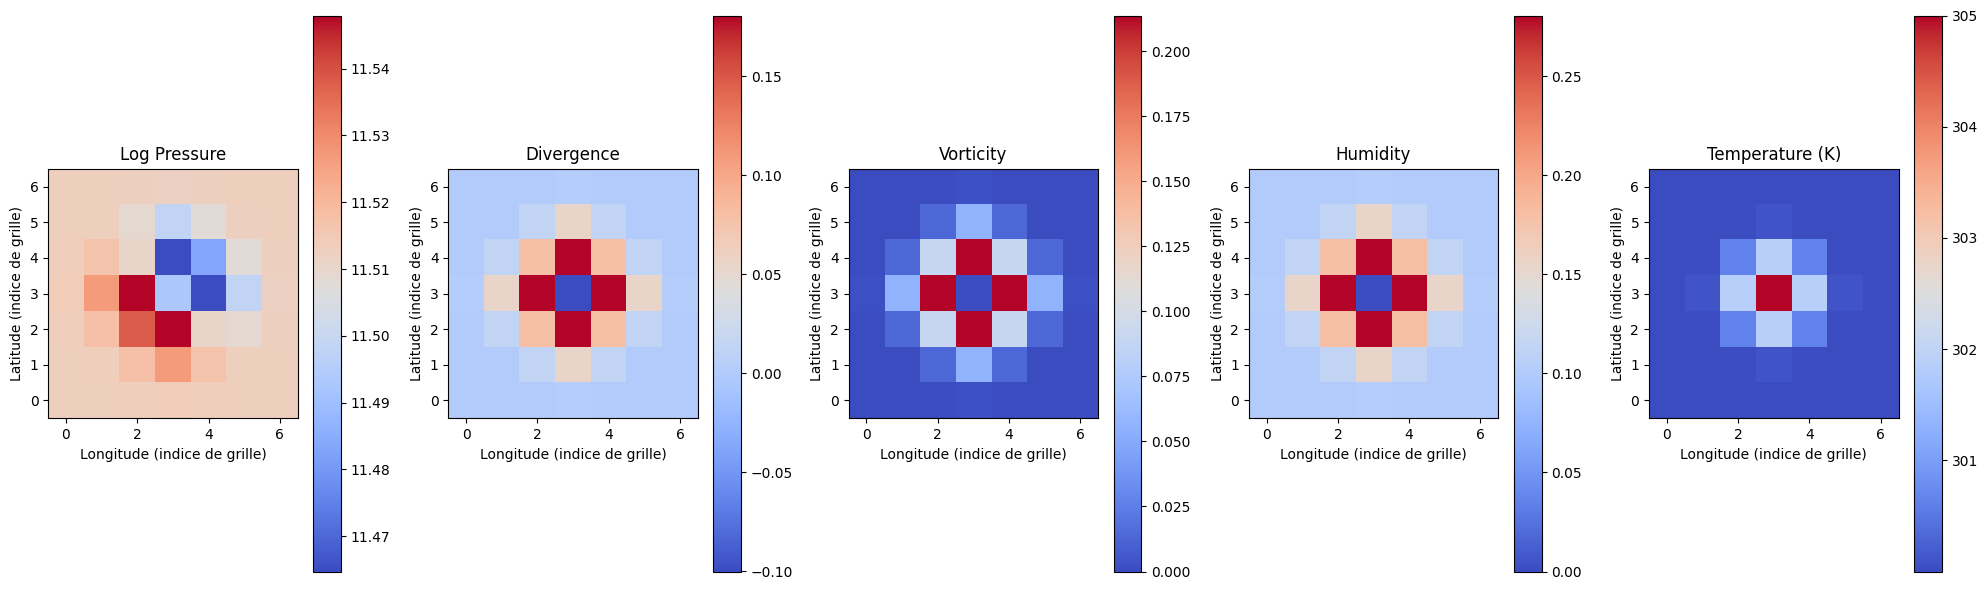

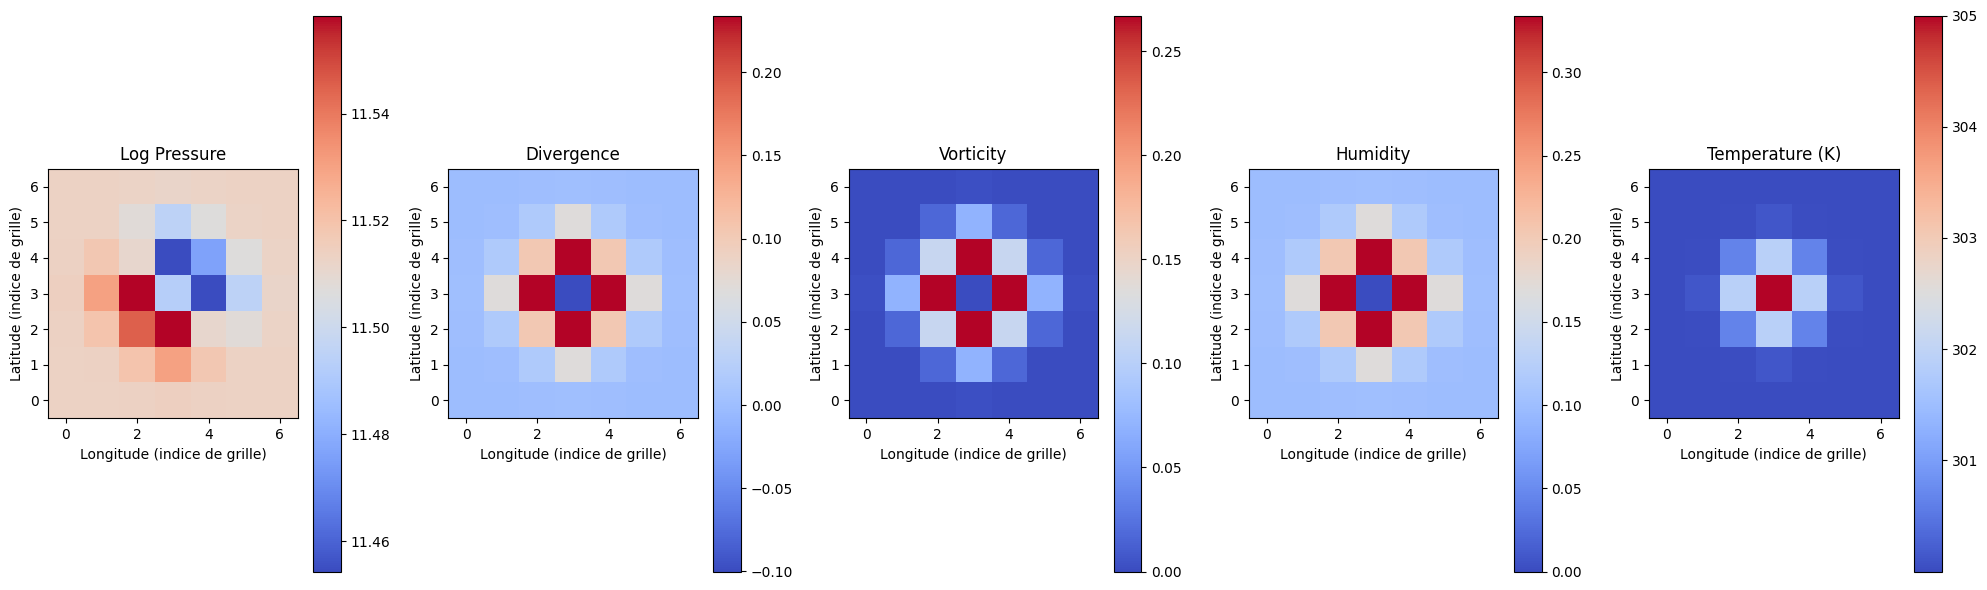

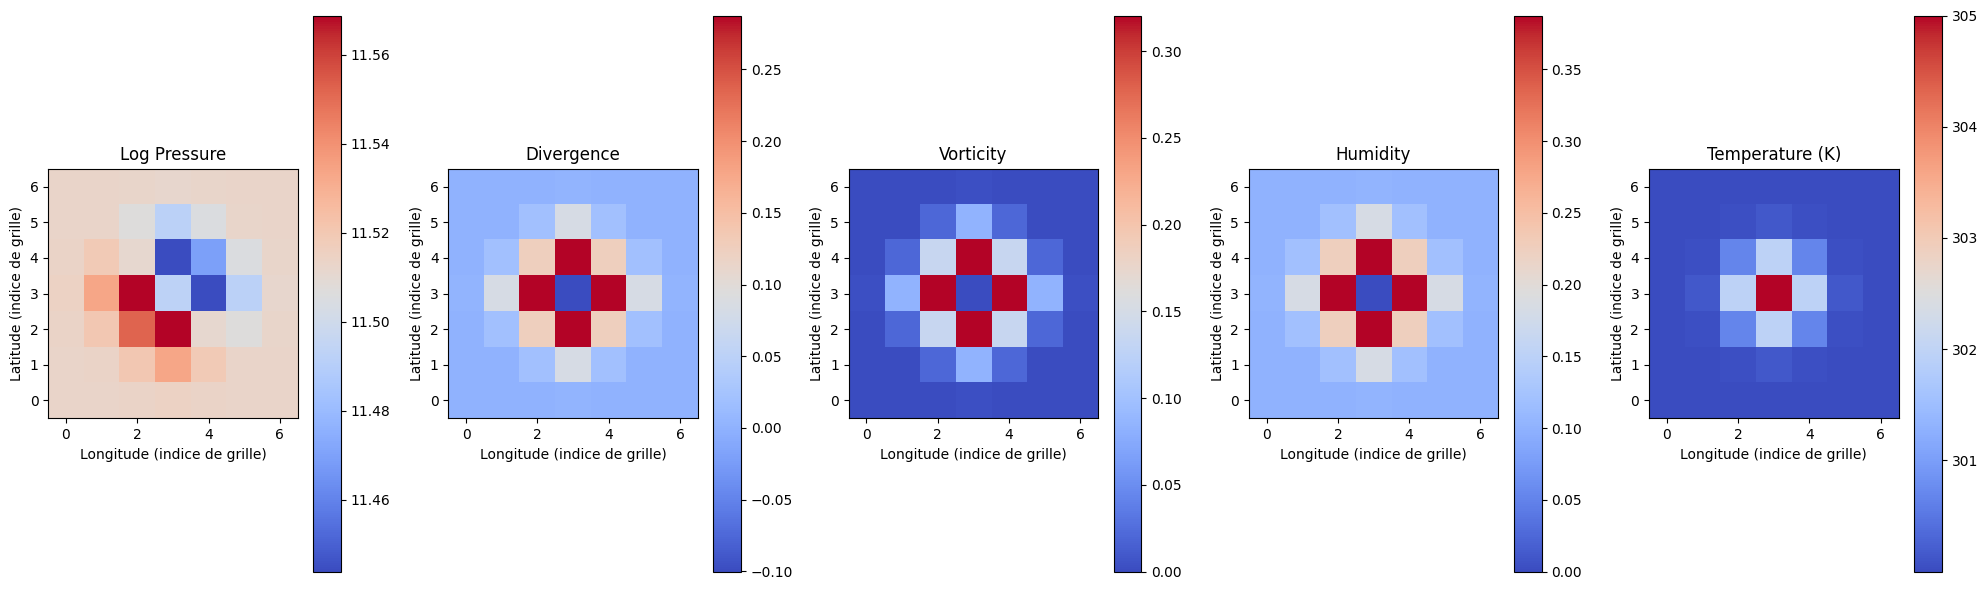

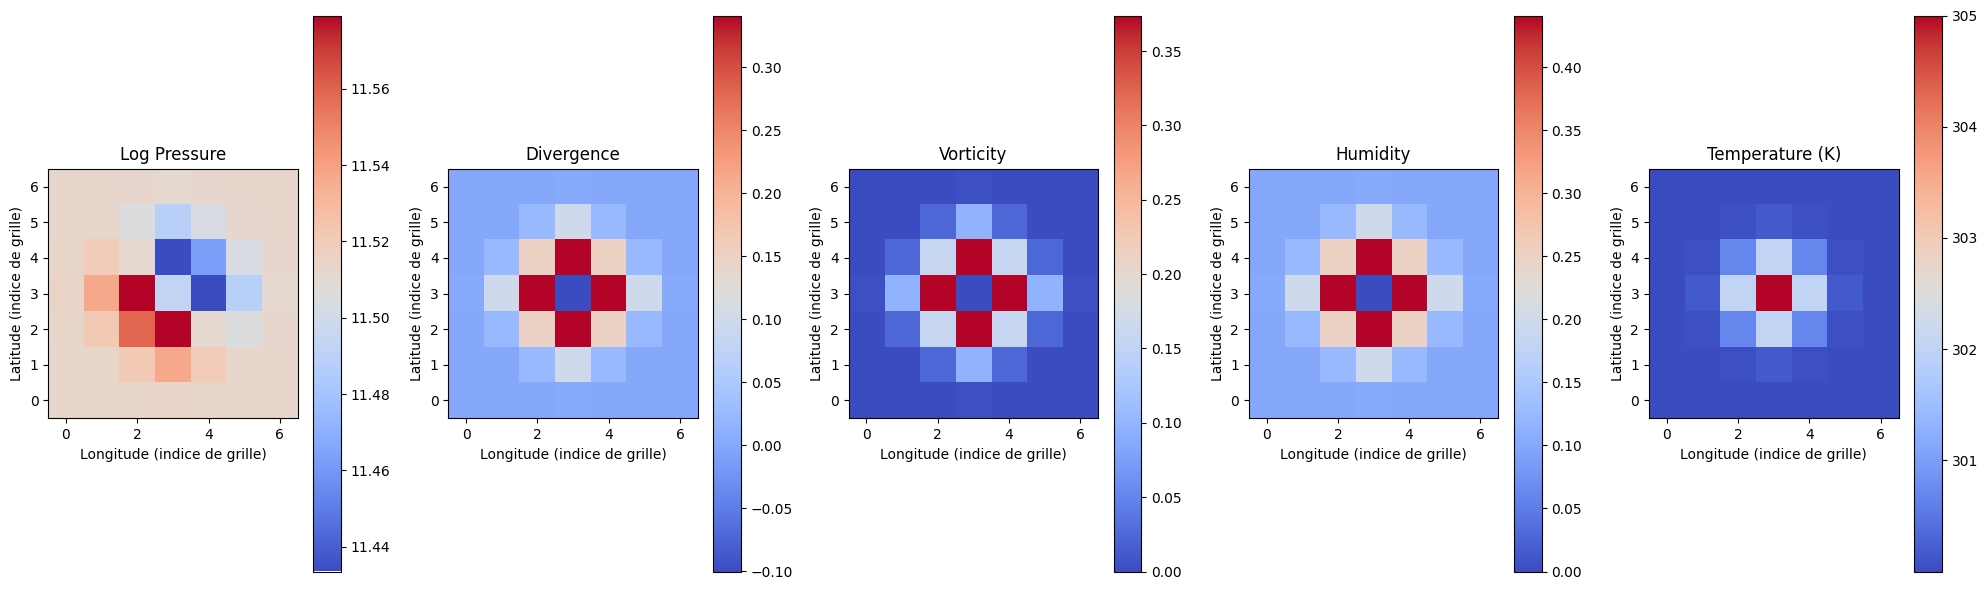

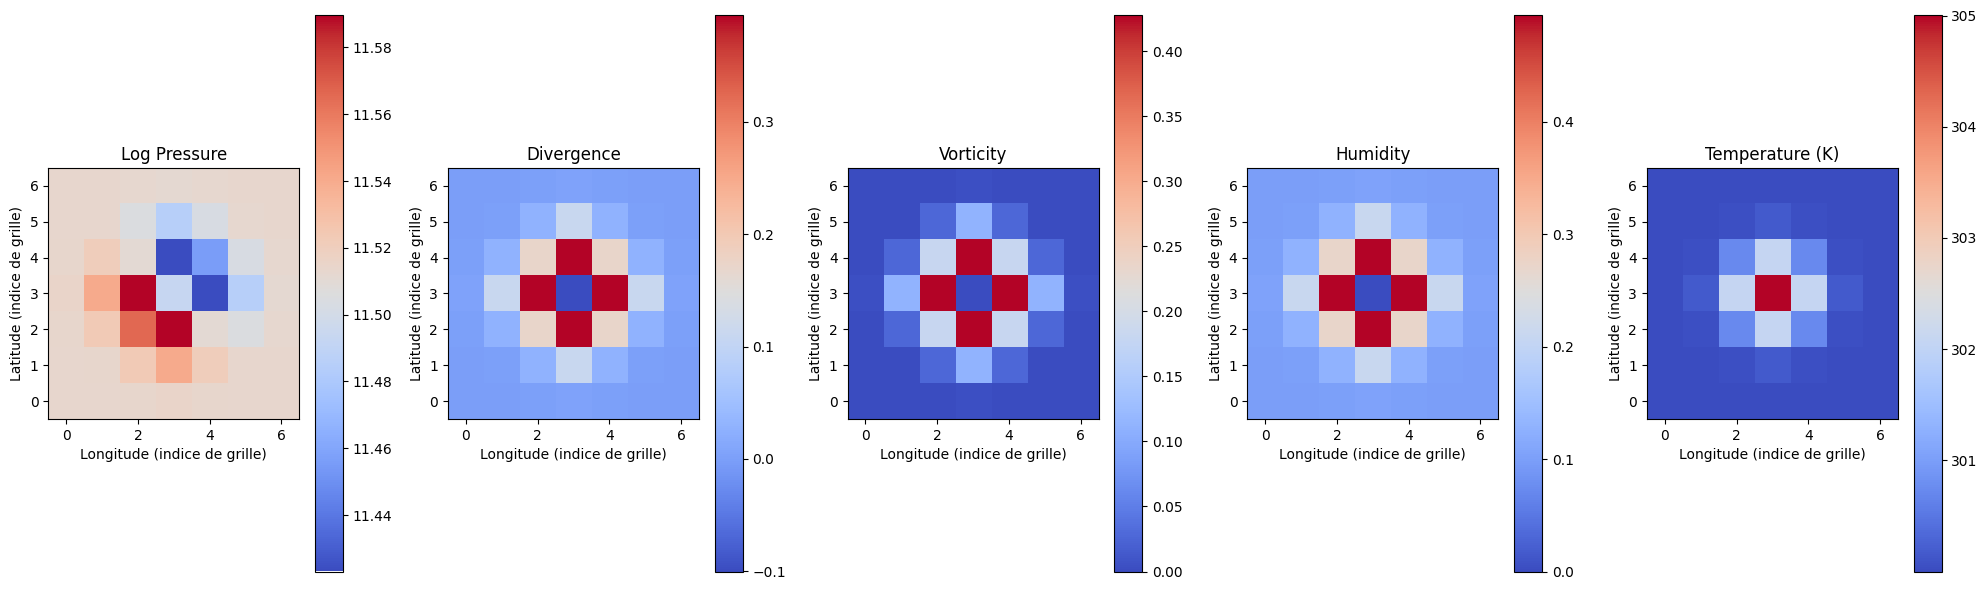

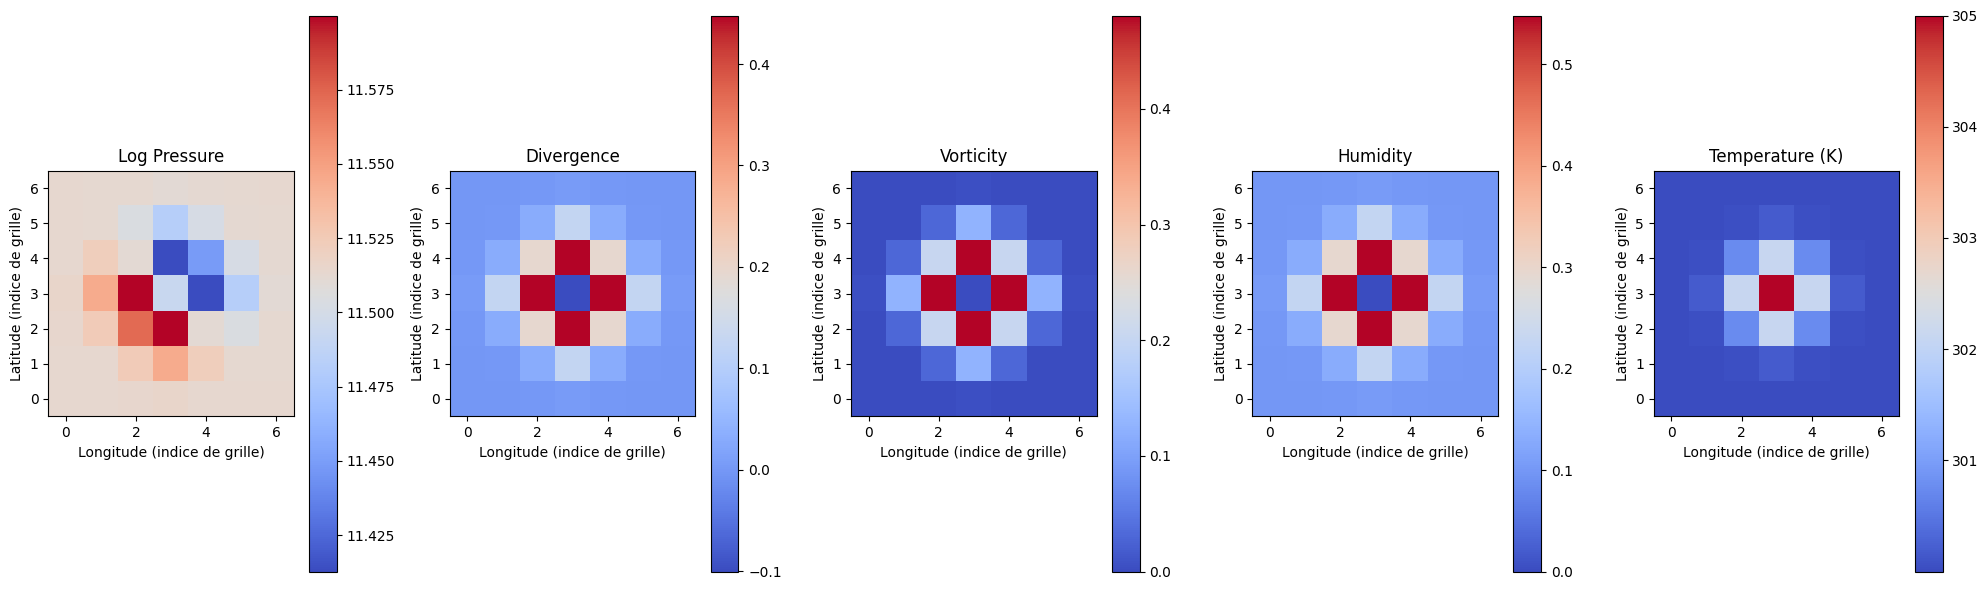

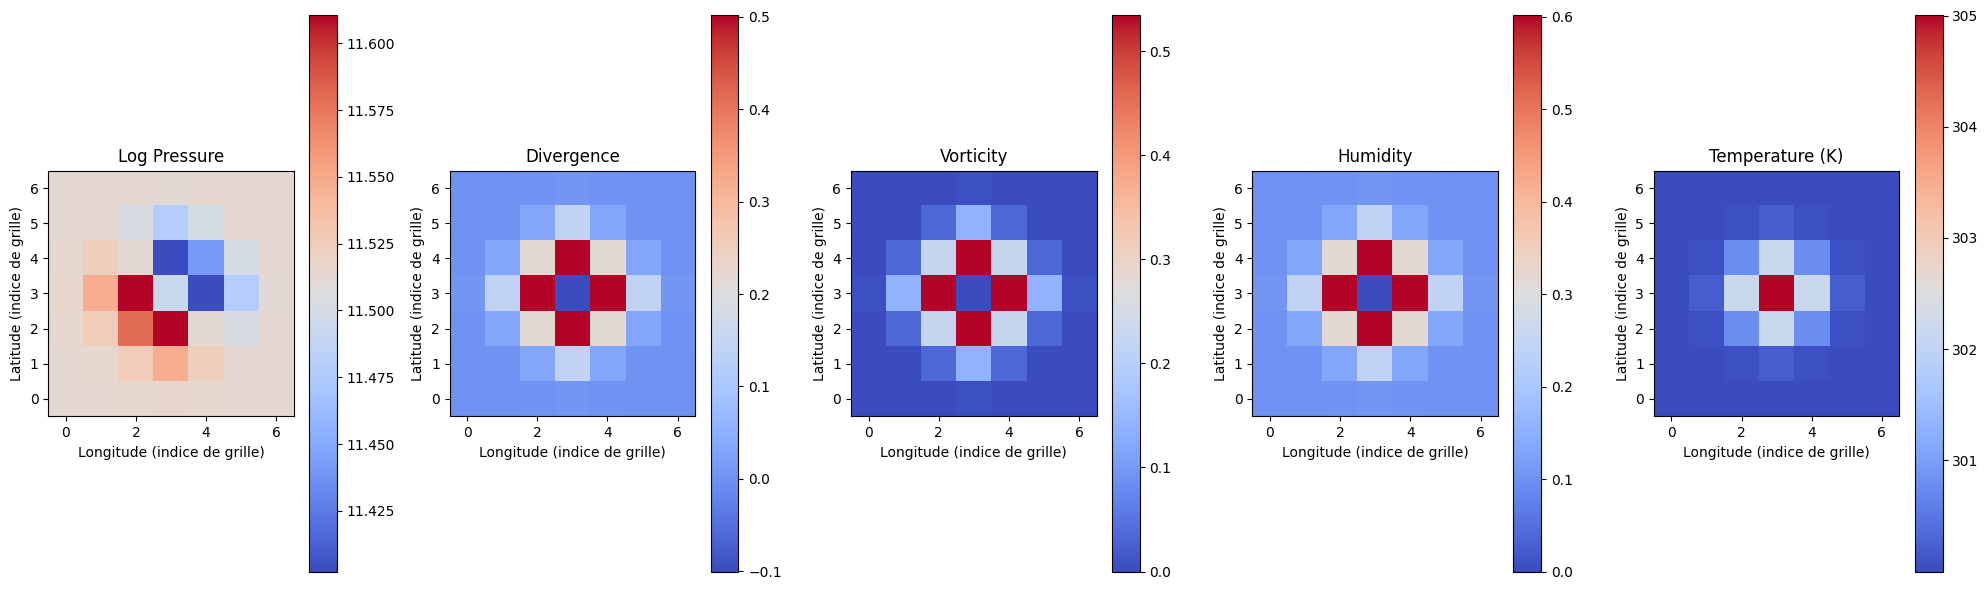

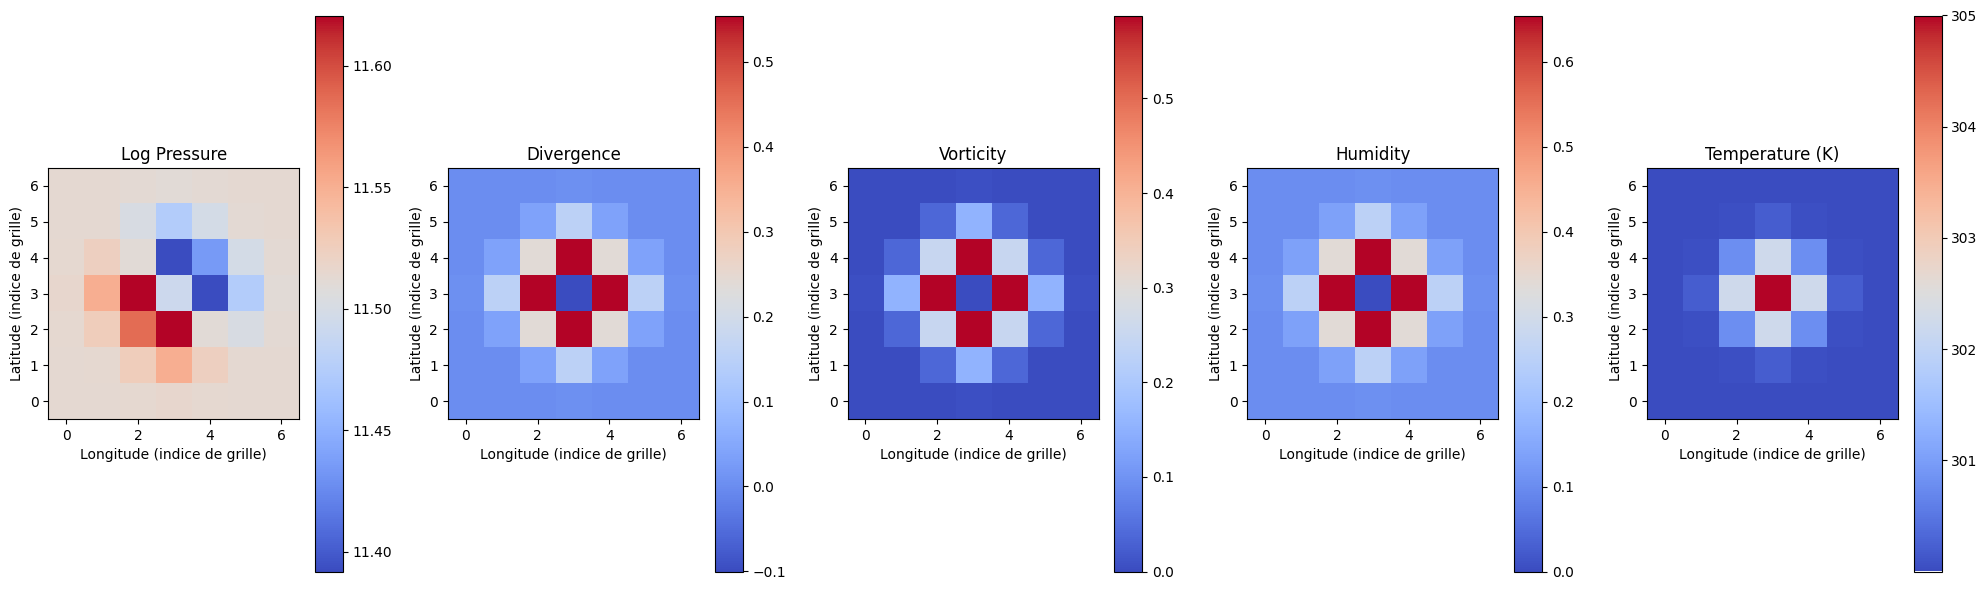

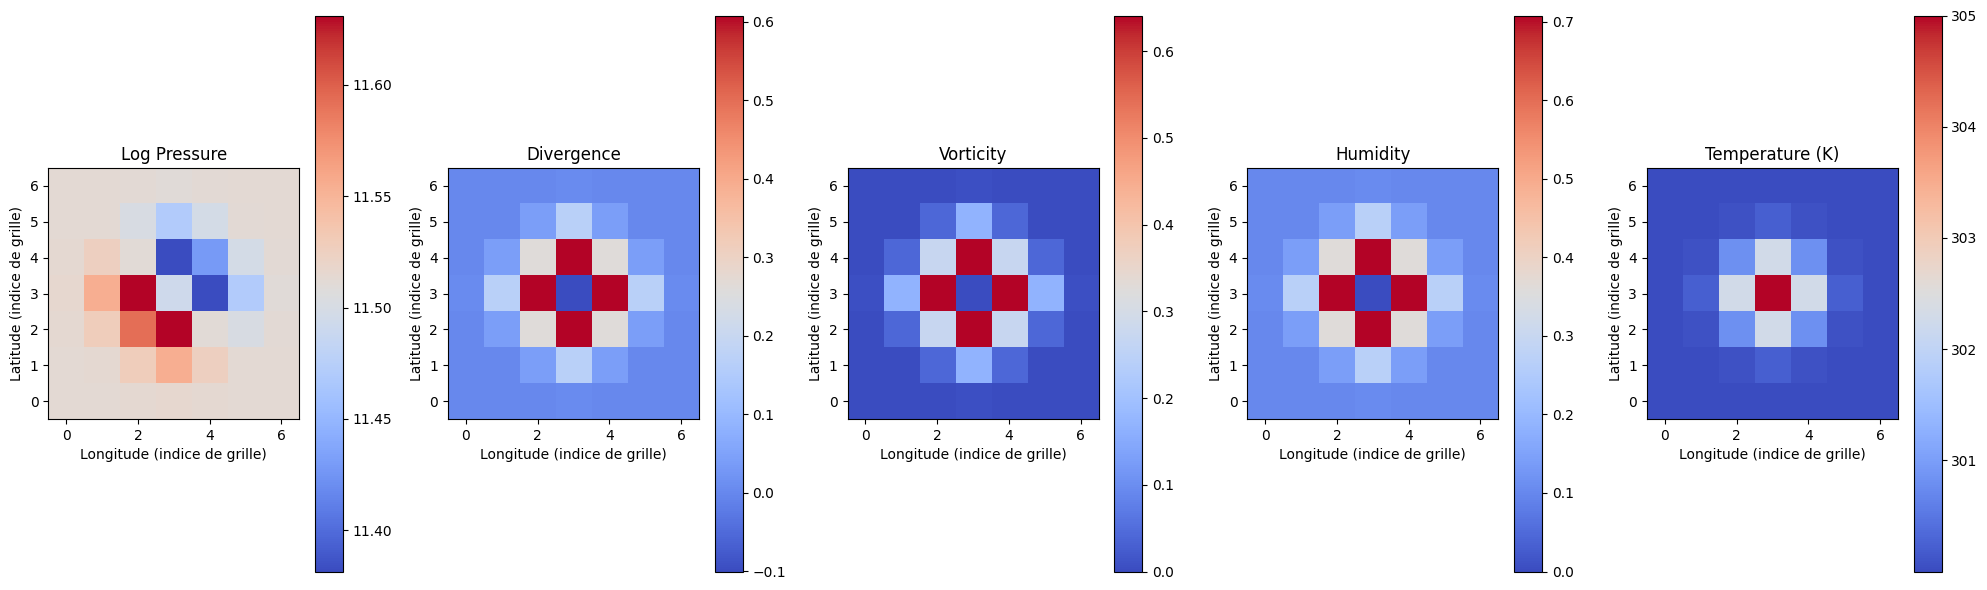

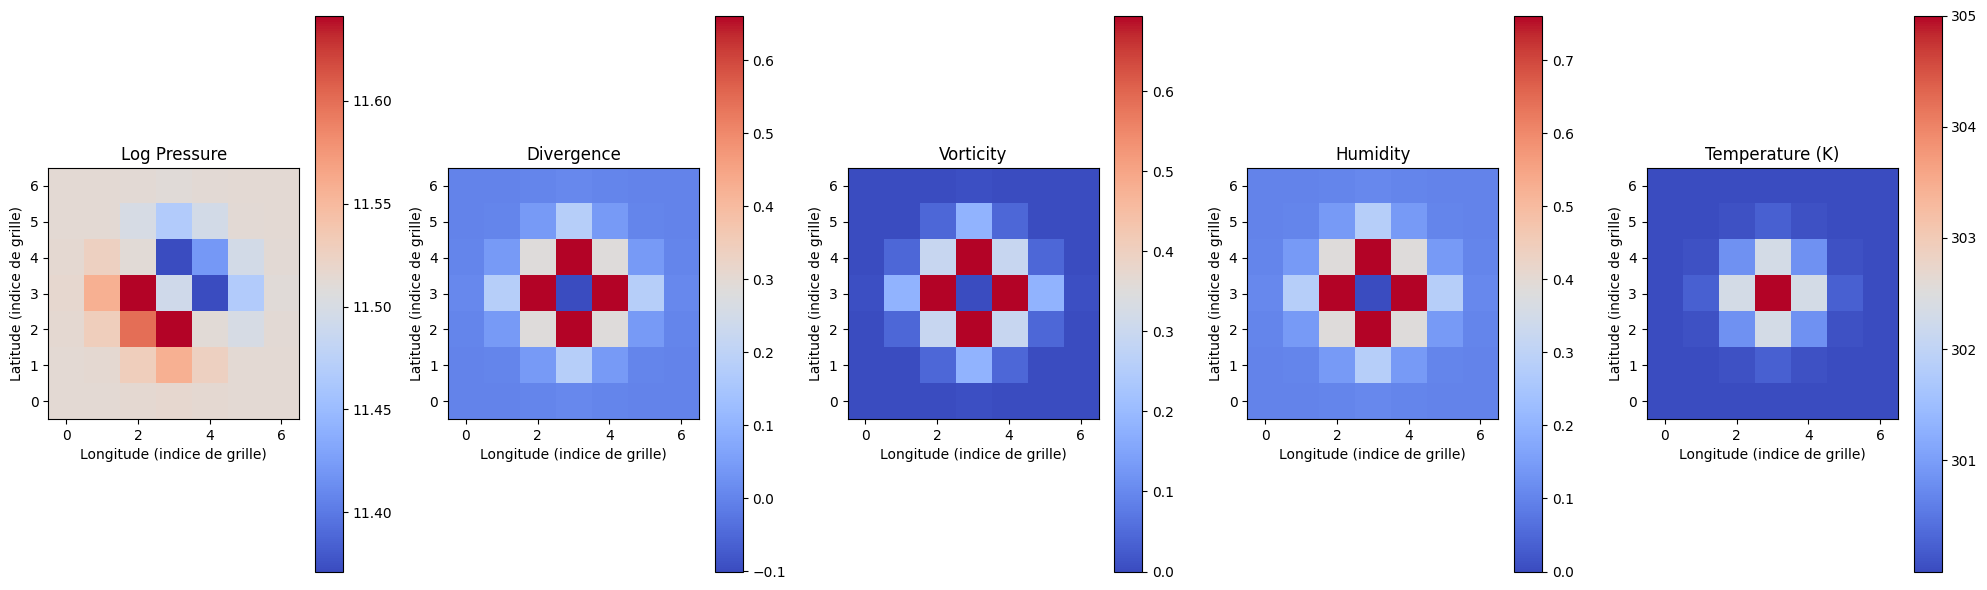

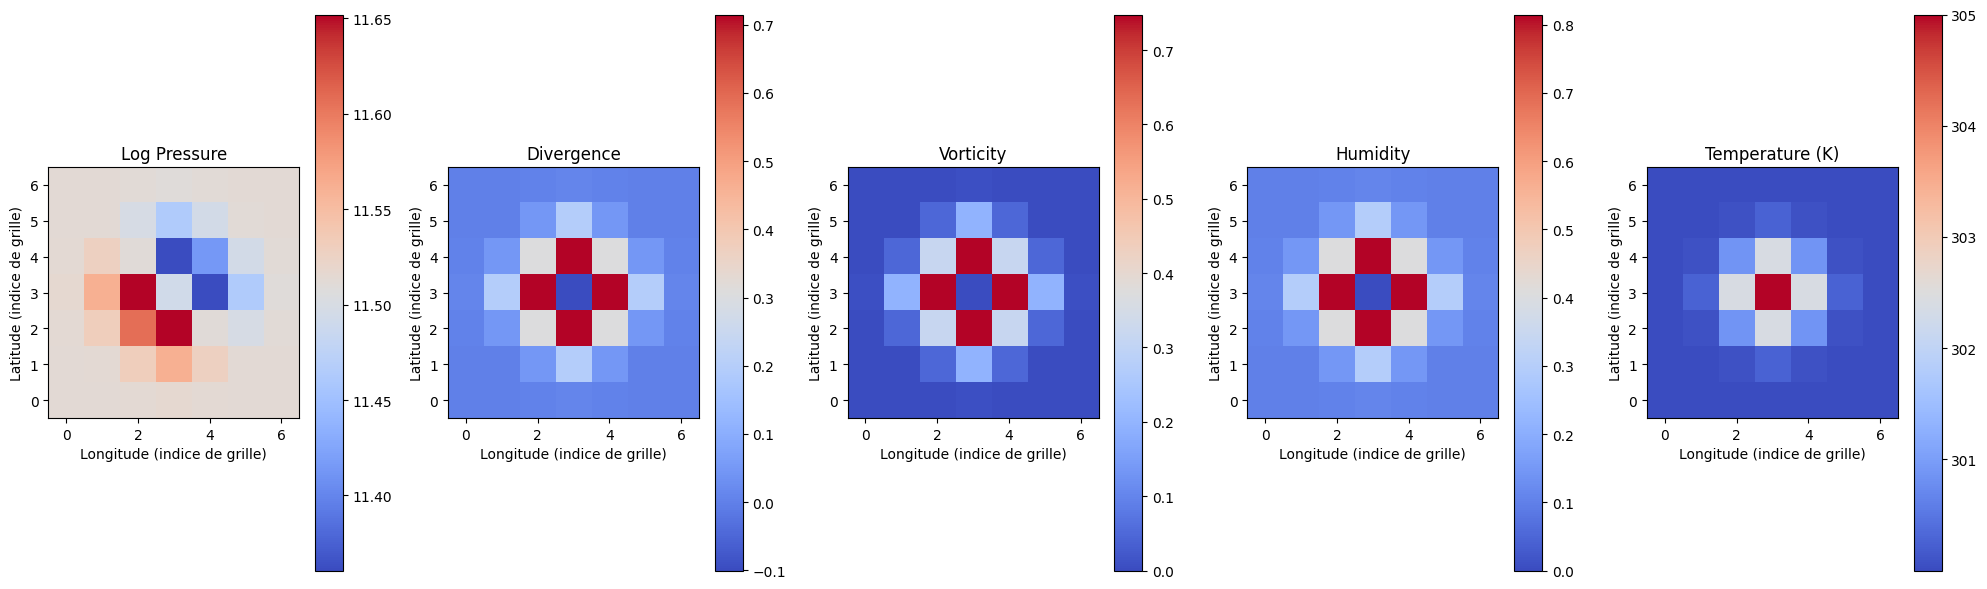

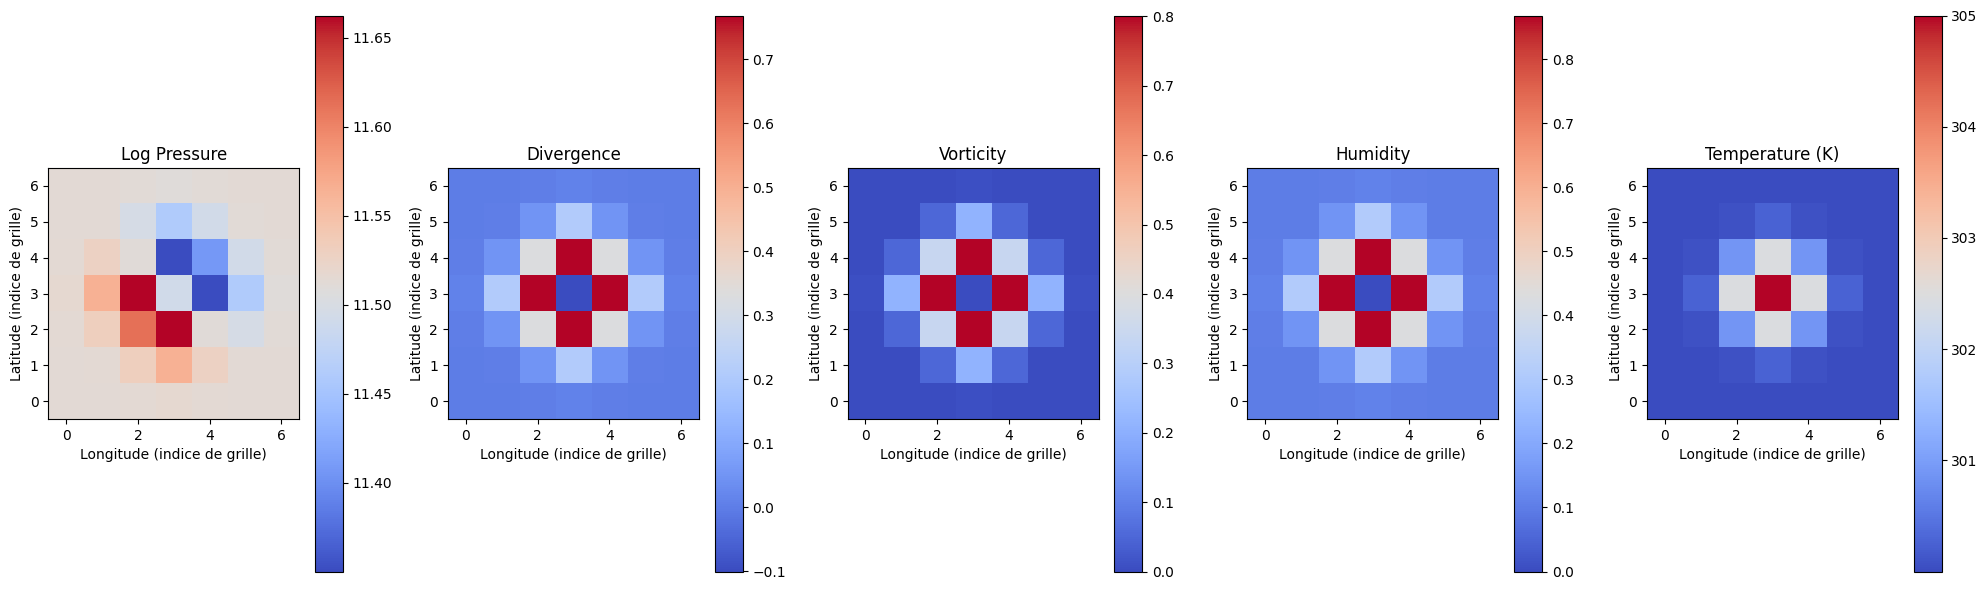

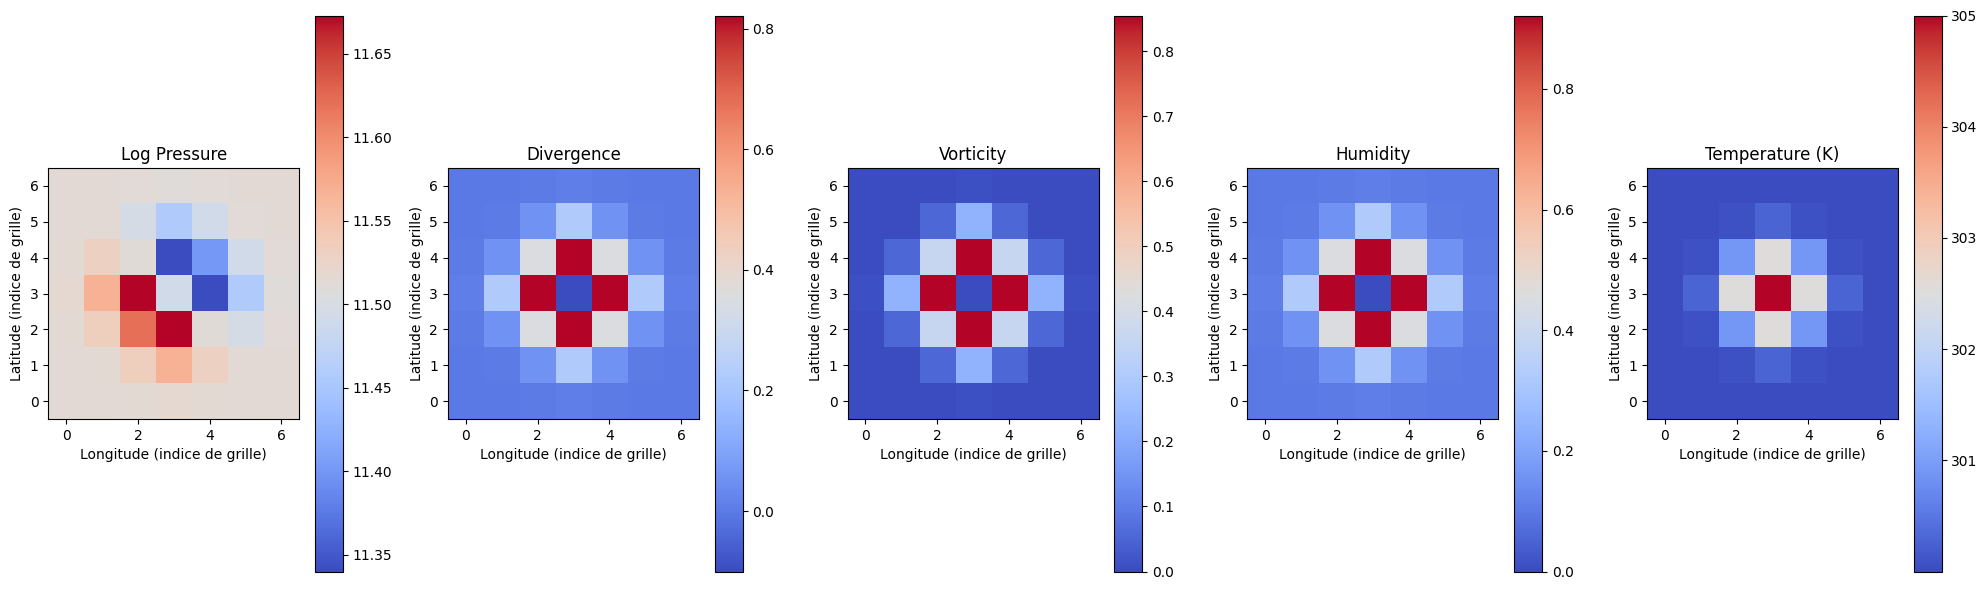

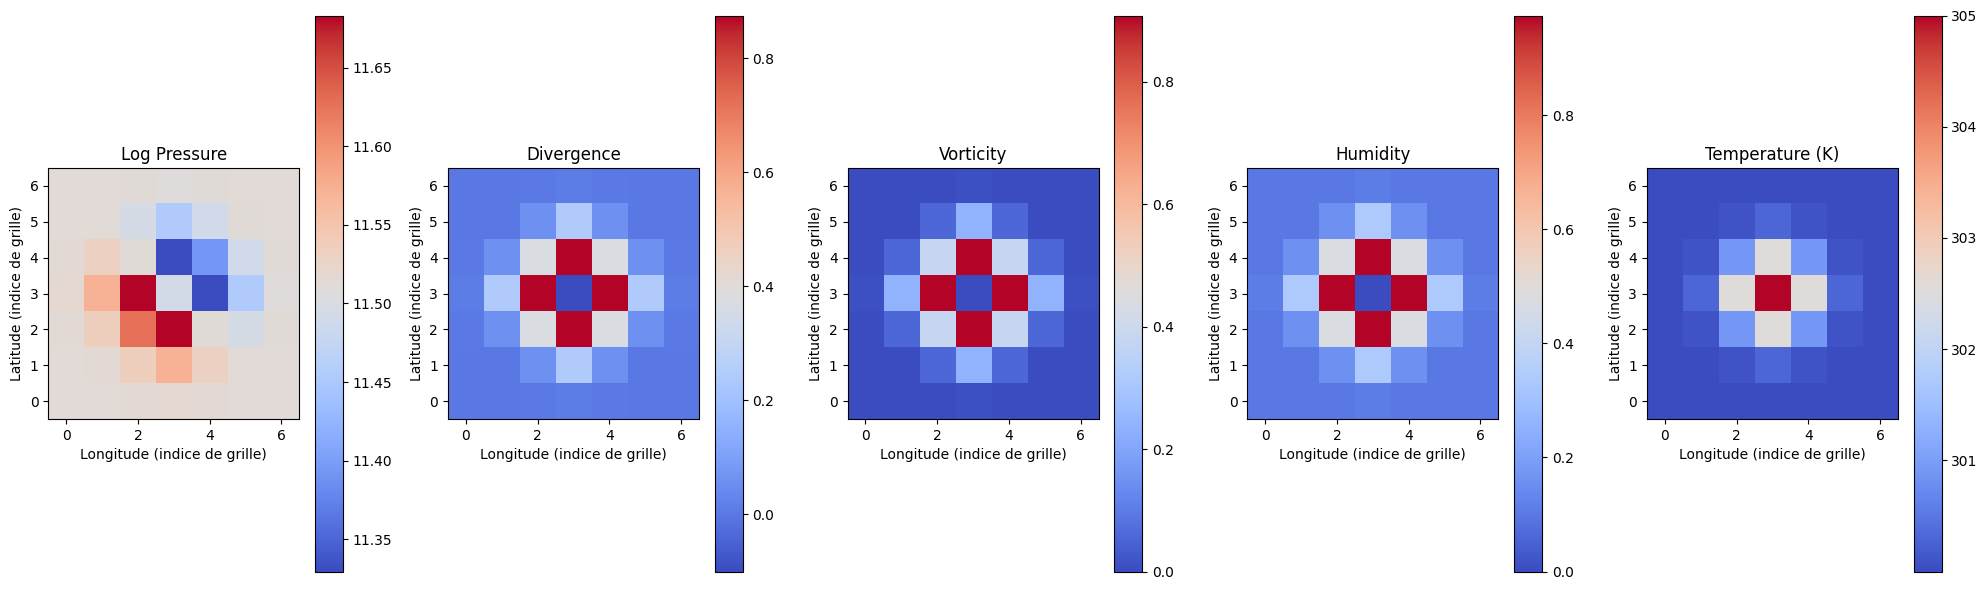

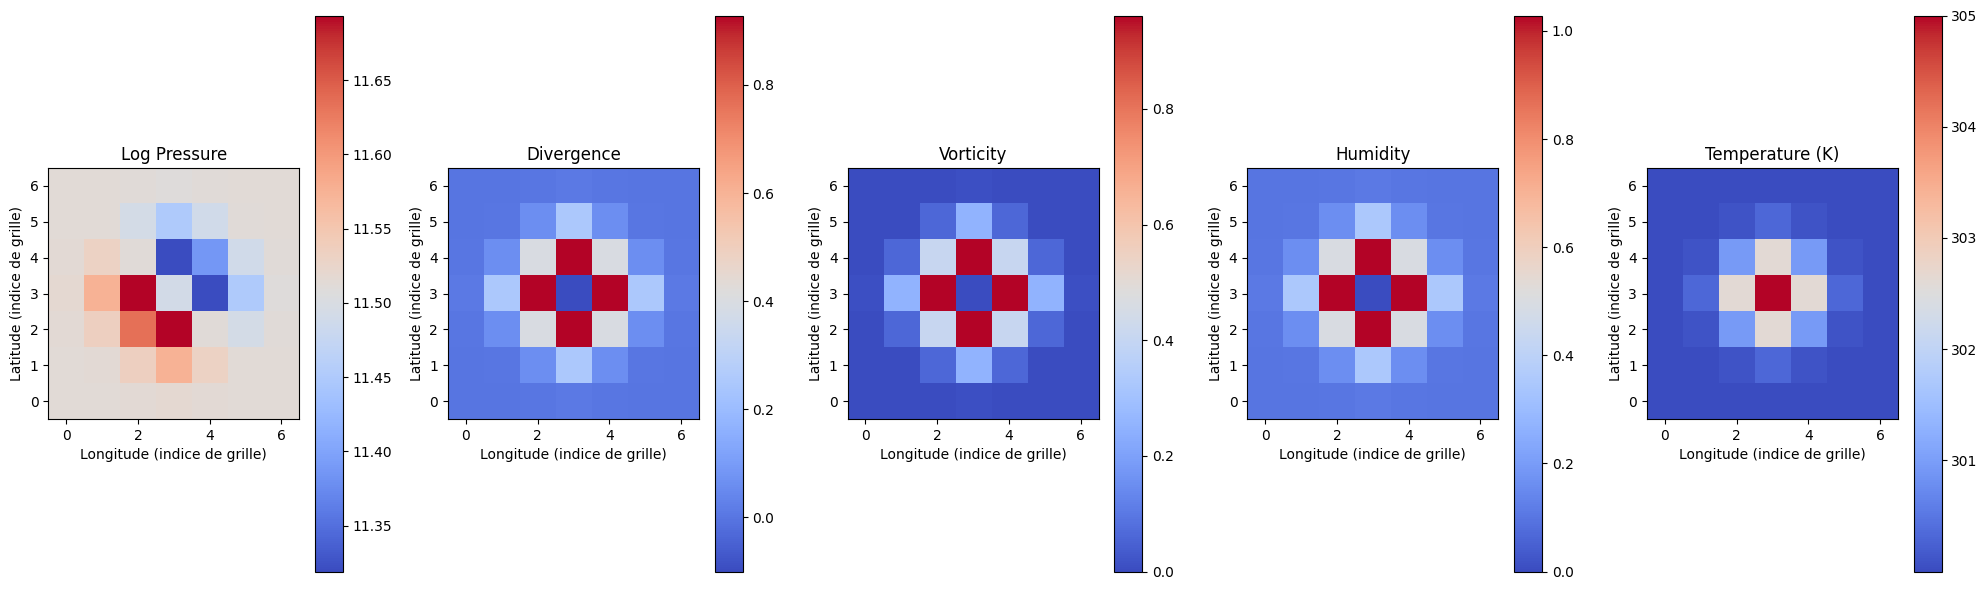

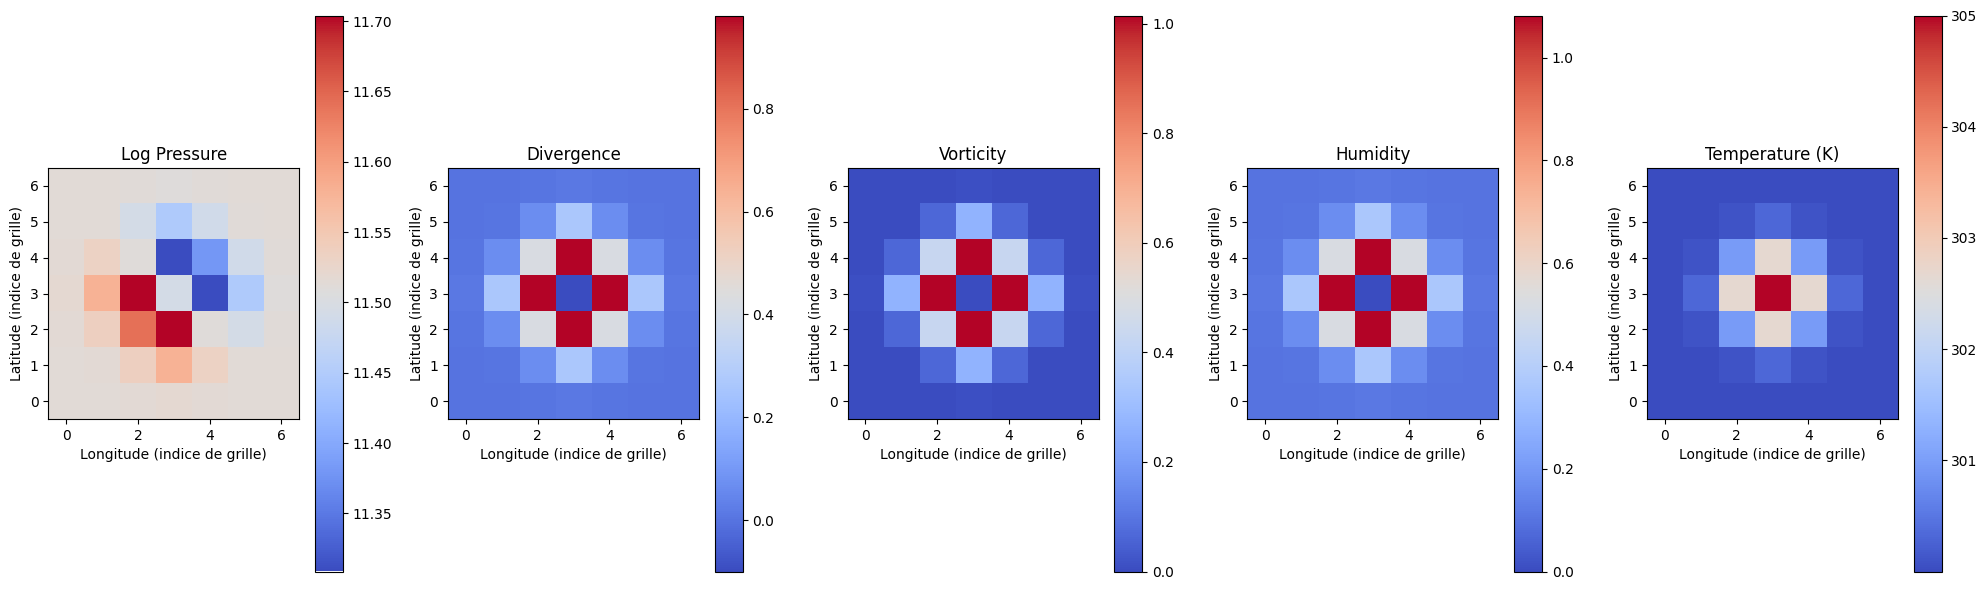

In [15]:
import matplotlib.pyplot as plt

def visualize_all_results(result, grid_size, t_eval):
    # Reformater les résultats pour les extraire de 'result.y'
    log_pressure = result.y.reshape((5, *grid_size, -1))[3]
    divergence = result.y.reshape((5, *grid_size, -1))[0]
    vorticity = result.y.reshape((5, *grid_size, -1))[1]
    humidity = result.y.reshape((5, *grid_size, -1))[4]
    temperature = result.y.reshape((5, *grid_size, -1))[2]


    for i in range(20):
        time_index = i

        # Extraction des données pour l'instant temporel choisi
        log_pressure_snapshot = log_pressure[:, :, time_index]
        divergence_snapshot = divergence[:, :, time_index]
        vorticity_snapshot = vorticity[:, :, time_index]
        humidity_snapshot = humidity[:, :, time_index]
        temperature_snapshot = temperature[:, :, time_index]

        fig, axes = plt.subplots(1, 5, figsize=(20, 6))

        # Log Pressure
        axes[0].imshow(log_pressure_snapshot, cmap="coolwarm", origin="lower")
        axes[0].set_title("Log Pressure")
        axes[0].set_xlabel("Longitude (indice de grille)")
        axes[0].set_ylabel("Latitude (indice de grille)")
        fig.colorbar(axes[0].images[0], ax=axes[0])

        # Divergence
        axes[1].imshow(divergence_snapshot, cmap="coolwarm", origin="lower")
        axes[1].set_title("Divergence")
        axes[1].set_xlabel("Longitude (indice de grille)")
        axes[1].set_ylabel("Latitude (indice de grille)")
        fig.colorbar(axes[1].images[0], ax=axes[1])

        # Vorticity
        axes[2].imshow(vorticity_snapshot, cmap="coolwarm", origin="lower")
        axes[2].set_title("Vorticity")
        axes[2].set_xlabel("Longitude (indice de grille)")
        axes[2].set_ylabel("Latitude (indice de grille)")
        fig.colorbar(axes[2].images[0], ax=axes[2])

        # Humidity
        axes[3].imshow(humidity_snapshot, cmap="coolwarm", origin="lower")
        axes[3].set_title("Humidity")
        axes[3].set_xlabel("Longitude (indice de grille)")
        axes[3].set_ylabel("Latitude (indice de grille)")
        fig.colorbar(axes[3].images[0], ax=axes[3])

        # Temperature
        axes[4].imshow(temperature_snapshot, cmap="coolwarm", origin="lower")
        axes[4].set_title("Temperature (K)")
        axes[4].set_xlabel("Longitude (indice de grille)")
        axes[4].set_ylabel("Latitude (indice de grille)")
        fig.colorbar(axes[4].images[0], ax=axes[4])

        plt.tight_layout()
        plt.show()


visualize_all_results(result, grid_size, t_eval)


#Evolution Coriolis